In [ ]:
import pandas as pd
import re
import pickle

# CLASSIFICATION

## Prepare Dataset

In [ ]:
df_train = pd.read_csv("train.csv")
df_valid = pd.read_csv("valid.csv")
df_test = pd.read_csv("test.csv")
df =  pd.concat([df_train, df_valid, df_test], ignore_index=True)
df

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive
...,...,...,...
995,502,Saya sudah sering kali datang menikmati makana...,positive
996,268,Banyak orang yang kurang suka untuk berobat ke...,negative
997,282,"Pelayanan baik, tempat parkir cukup luas, kebu...",positive
998,407,"Demi apa pun tes cpns bikin macet, sialannnnnnn",negative


In [ ]:
df.label.value_counts()

## Text Normalization

In [ ]:
def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [ ]:
df['text_clean'] = df.text.apply(cleansing)
df.head()

,id,text,label,text_clean
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral,nikmati cicilan 0 hingga 12 bulan untuk pemes...
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive,kue kue yang disajikan bikin saya bernostalgia...
2,436,Ibu pernah bekerja di grab indonesia,neutral,ibu pernah bekerja di grab indonesia
3,394,Paling suka banget makan siang di sini ayam sa...,positive,paling suka banget makan siang di sini ayam sa...
4,592,Pelayanan bus DAMRI sangat baik,positive,pelayanan bus damri sangat baik


## Feature Extraction

### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_preprocessed = df.text_clean.tolist()

In [ ]:
# Proses Feature Extraction
count_vect = CountVectorizer()

X = count_vect.fit_transform(data_preprocessed)
print("Feature Extraction selesai")

Feature Extraction selesai


In [ ]:
count_array = X.toarray()
df_array = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())
print(df_array)

     00  000  10  100  10000  101  11  12  120  13  ...  yooyee  youtube  \
0     0    0   0    0      0    0   0   1    0   0  ...       0        0   
1     0    0   0    0      0    0   0   0    0   0  ...       0        0   
2     0    0   0    0      0    0   0   0    0   0  ...       0        0   
3     0    0   1    0      0    0   0   0    0   0  ...       0        0   
4     0    0   0    0      0    0   0   0    0   0  ...       0        0   
..   ..  ...  ..  ...    ...  ...  ..  ..  ...  ..  ...     ...      ...   
995   0    0   0    0      0    0   0   0    0   0  ...       0        0   
996   0    0   0    0      0    0   0   0    0   0  ...       0        0   
997   0    0   0    0      0    0   0   0    0   0  ...       0        0   
998   0    0   0    0      0    0   0   0    0   0  ...       0        0   
999   0    0   0    0      0    0   0   0    0   0  ...       0        0   

     yummi  yummy  yun  yup  yuummy  zaman  zan  zebra  
0        0      0    0    0   

In [ ]:
pickle.dump(count_vect, open("feature.p", "wb")) # save feature to pickle

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_preprocessed = df.text_clean.tolist()

In [ ]:
# Proses Feature Extraction
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data_preprocessed)
print("Feature Extraction selesai")

Feature Extraction selesai


In [ ]:
with open('tfidf_vect.p','wb') as handle:
    pickle.dump(tfidf_vect, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tfidf_vect.pickle has created!")

tfidf_vect.pickle has created!


In [ ]:
tfidf_array = X.toarray()
df_array = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names_out())
print(df_array)

      00  000        10  100  10000  101   11       12  120   13  ...  yooyee  \
0    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.27568  0.0  0.0  ...     0.0   
1    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
2    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
3    0.0  0.0  0.137447  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
4    0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
..   ...  ...       ...  ...    ...  ...  ...      ...  ...  ...  ...     ...   
995  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
996  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
997  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
998  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   
999  0.0  0.0  0.000000  0.0    0.0  0.0  0.0  0.00000  0.0  0.0  ...     0.0   

     youtube  yummi  yummy 

### Prepare train and test dataset (split dataset)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# save output feature in variable classes
classes = df.label

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4243)
(200, 4243)
(800,)
(200,)


## Model Training

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB #load library naive bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("Training selesai")

Training selesai


In [ ]:
# save model to pickle
pickle.dump(model, open("model_naivebayes.p", "wb"))

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier #load library neural network

In [ ]:
# model training menggunakan neural network
model = MLPClassifier()
model.fit(X_train, y_train)

print("Training selesai")

# save model to pickle
pickle.dump(model, open("model_neuralnetwork.p", "wb"))

Training selesai


## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = model.predict(X_test)
print ("Testing selesai")
print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.66      0.78      0.72        68
     neutral       0.85      0.64      0.73        55
    positive       0.81      0.83      0.82        77

    accuracy                           0.76       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.77      0.76      0.76       200



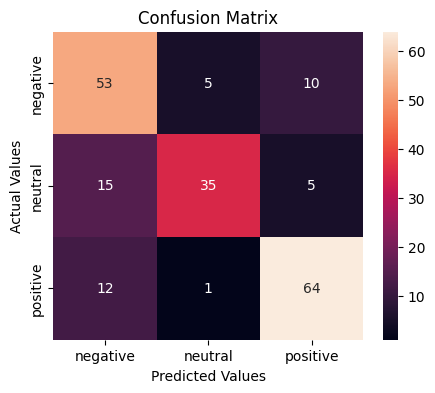

In [ ]:
cm = confusion_matrix(y_test, test, labels=["negative", "neutral", "positive"])

cm_df = pd.DataFrame(cm,
                     index =["negative", "neutral", "positive"],
                     columns =["negative", "neutral", "positive"])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from statistics import mean, stdev

In [ ]:
X = df[["text_clean"]] # input feature
Y = df["label"] # output feature

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# cross validation dengan split = 5
kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies=[]

X_train = X_train.reset_index().text_clean
y_train = y_train.reset_index().label

In [ ]:
def cross_validation(k, X_train, model, name):
  accuracies = []
  precisions = []
  recalls = []
  f1_scores = []

  # iterate sebanyak k cross validation
  for iteration, data in enumerate(kf.split(X_train), start=1):
      # get data and target train
      data_train = X_train[data[0]]
      tfidf_vect = TfidfVectorizer()
      data_train = tfidf_vect.fit_transform(data_train)

      target_train = y_train[data[0]]

      # get data and target test
      data_test =  X_train[data[1]]
      data_test = tfidf_vect.transform(data_test)

      target_test =  y_train[data[1]]

      # model training menggunakan data train
      classifier = model
      classifier.fit(data_train, target_train)

      # prediksi data test
      preds = classifier.predict(data_test)

      # menghitung accuracy
      accuracy = accuracy_score(target_test, preds)
      precision = precision_score(target_test, preds, average='weighted')
      recall = recall_score(target_test, preds, average='weighted')
      f1 = f1_score(target_test, preds, average='weighted')

      # print("Training ke-", iteration)
      # print(classification_report(target_test, preds))
      # print("=================================================================")

      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)
      f1_scores.append(f1)

  result = {'algorithm': name,
                'accuracy_per_iter': accuracies, 'accuracy_mean': mean(accuracies), 'accuracy_std': stdev(accuracies),
                'recall_mean': mean(recalls),'precision_mean': mean(precisions), 'f1_mean': mean(f1_scores)}
  return result


In [ ]:
result = cross_validation(5, X_train, MultinomialNB(), "Naive Bayes")
result

{'algorithm': 'Naive Bayes',
 'accuracy_per_iter': [0.7375, 0.6625, 0.71875, 0.625, 0.6],
 'accuracy_mean': 0.66875,
 'accuracy_std': 0.05896238207535379,
 'recall_mean': 0.66875,
 'precision_mean': 0.732325870793293,
 'f1_mean': 0.6207464801199938}

### Compare All Models with Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [ ]:
X = df[["text_clean"]] # input feature
Y = df["label"] # output feature

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

X_train = X_train.reset_index().text_clean
y_train = y_train.reset_index().label

X_test = X_test.reset_index().text_clean
y_test = y_test.reset_index().label

In [ ]:
# loading model
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Naive Bayes', MultinomialNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('Neural Network', MLPClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))

In [ ]:
# evaluating the model
results = []
for name, model in models:
      print(name)
      result = cross_validation(5, X_train, model, name)
      results.append(result)
      print(result)
results = pd.DataFrame(results)
results = results.sort_values("accuracy_mean",ascending=False)

Logistic Regression
{'algorithm': 'Logistic Regression', 'accuracy_per_iter': [0.78125, 0.76875, 0.79375, 0.7625, 0.775], 'accuracy_mean': 0.77625, 'accuracy_std': 0.01202211503854458, 'recall_mean': 0.77625, 'precision_mean': 0.7938504898344007, 'f1_mean': 0.7686172595569355}
K Nearest Neighbour
{'algorithm': 'K Nearest Neighbour', 'accuracy_per_iter': [0.7, 0.69375, 0.71875, 0.7, 0.7], 'accuracy_mean': 0.7025, 'accuracy_std': 0.009478594305064453, 'recall_mean': 0.7025, 'precision_mean': 0.7077453635566503, 'f1_mean': 0.693304403616484}
Naive Bayes
{'algorithm': 'Naive Bayes', 'accuracy_per_iter': [0.675, 0.625, 0.725, 0.65625, 0.7125], 'accuracy_mean': 0.67875, 'accuracy_std': 0.04088856808449031, 'recall_mean': 0.67875, 'precision_mean': 0.7420644752162837, 'f1_mean': 0.6249862234912519}
Support Vector Machine
{'algorithm': 'Support Vector Machine', 'accuracy_per_iter': [0.76875, 0.76875, 0.75625, 0.7125, 0.7375], 'accuracy_mean': 0.74875, 'accuracy_std': 0.02396286189085102, 'reca

In [ ]:
results

,algorithm,accuracy_per_iter,accuracy_mean,accuracy_std,recall_mean,precision_mean,f1_mean
4,Neural Network,"[0.775, 0.75625, 0.8125, 0.78125, 0.775]",0.78000,0.020444,0.78000,0.781876,0.775335
0,Logistic Regression,"[0.78125, 0.76875, 0.79375, 0.7625, 0.775]",0.77625,0.012022,0.77625,0.793850,0.768617
6,Random Forest,"[0.74375, 0.75625, 0.8, 0.74375, 0.7625]",0.76125,0.023133,0.76125,0.764318,0.759152
3,Support Vector Machine,"[0.76875, 0.76875, 0.75625, 0.7125, 0.7375]",0.74875,0.023963,0.74875,0.791128,0.729608
7,Gradient Boosting,"[0.775, 0.76875, 0.725, 0.68125, 0.7625]",0.74250,0.039380,0.74250,0.745999,0.742146
1,K Nearest Neighbour,"[0.7, 0.69375, 0.71875, 0.7, 0.7]",0.70250,0.009479,0.70250,0.707745,0.693304
2,Naive Bayes,"[0.675, 0.625, 0.725, 0.65625, 0.7125]",0.67875,0.040889,0.67875,0.742064,0.624986
5,Decision Tree,"[0.625, 0.7, 0.63125, 0.63125, 0.65625]",0.64875,0.031062,0.64875,0.654050,0.649424
8,AdaBoost,"[0.6125, 0.6625, 0.55, 0.575, 0.5875]",0.59750,0.042757,0.59750,0.624561,0.601401


### Select model with the best performance

In [ ]:
# convert to feature
tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(X_train)

# model training menggunakan neural network
model = LogisticRegression()
model.fit(X_train, y_train)

print("Training selesai")

# save model to pickle
pickle.dump(model, open("model_classification.p", "wb"))

Training selesai


In [ ]:
X_test = tfidf_vect.transform(X_test)

test = model.predict(X_test)
print ("Testing selesai")
print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.79      0.83      0.81        83
     neutral       0.71      0.64      0.68        39
    positive       0.86      0.86      0.86        78

    accuracy                           0.81       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.80      0.81      0.80       200



## Prediksi data baru

In [ ]:
input_text = "Paling senang banget makan siang di sini"

# normalize text
text = tfidf_vect.transform([cleansing(input_text)])

# predict data baru menggunakan model yang telah dibuat
result = model.predict(text)[0]

print("Sentiment:", result)

Sentiment: positive


# REGRESSION

## Prepare Dataset

In [ ]:
df = pd.read_csv("Data Harga Mobil.csv")
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium


## Prepare Train and Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["highway-mpg"]] # input feature
# X = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
Y = df["price"] # output feature

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(41, 1)
(41,)


## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

37220.00976571404

In [ ]:
lm.coef_

array([-785.89266058])

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

In [ ]:
y_hat = lm.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_hat))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_hat)))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_hat))
print("R2: ", r2_score(y_test, y_hat))

MAE:  3788.9607696107855
RMSE:  5710.43156446088
MAPE:  0.2715278580735554
R2:  0.5593638465817192


### Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# cross validation dengan split = 5
kf = KFold(n_splits=5, random_state=42, shuffle=True)

results=[]

In [ ]:
# iterate sebanyak k cross validation
for iteration, data in enumerate(kf.split(X_train), start=1):

    # get data and target train
    data_train = X_train.values[data[0]]
    target_train = y_train.values[data[0]]

    # get data and target test
    data_test =  X_train.values[data[1]]
    target_test =  y_train.values[data[1]]

    # model training menggunakan data train
    # regressor = LinearRegression()
    regressor = LinearRegression()
    regressor.fit(data_train, target_train)

    # prediksi data test
    preds = regressor.predict(data_test)

    # menghitung accuracy
    mae = mean_absolute_error(target_test, preds)
    rmse = math.sqrt(mean_squared_error(target_test, preds))
    mape = mean_absolute_percentage_error(target_test, preds)
    r2 = r2_score(target_test, preds)

    print("Training ke-", iteration)
    print("MAE: ", mae)
    print("RMSE: ", rmse)
    print("MAPE: ", mape)
    print("R2: ", r2)
    print("=================================================================")

    result = {'training': iteration, 'mae': mae, 'rmse': rmse, 'mape': mape,
                'r2':r2}
    results.append(result)

results = pd.DataFrame(results)

Training ke- 1
MAE:  4051.8593158149415
RMSE:  5429.117400886815
MAPE:  0.3517737100989862
R2:  0.4904353067731366
Training ke- 2
MAE:  5415.987340958044
RMSE:  7661.395652656033
MAPE:  0.37685392266158924
R2:  0.40210312620587685
Training ke- 3
MAE:  3693.9900464540606
RMSE:  5040.0679180613415
MAPE:  0.2996313491338429
R2:  0.49011297099249773
Training ke- 4
MAE:  3578.3172134820907
RMSE:  5137.898728680406
MAPE:  0.28591959365040587
R2:  0.586016758271874
Training ke- 5
MAE:  4182.59526049044
RMSE:  5123.546809029184
MAPE:  0.4236980341061571
R2:  -0.2729396909238728


In [ ]:
print(results)
print("Avg MAE: ", results.mae.mean())
print("Avg RMSE: ", results.rmse.mean())
print("Avg MAPE: ", results.mape.mean())
print("Avg R2: ", results.r2.mean())

   training          mae         rmse      mape        r2
0         1  4051.859316  5429.117401  0.351774  0.490435
1         2  5415.987341  7661.395653  0.376854  0.402103
2         3  3693.990046  5040.067918  0.299631  0.490113
3         4  3578.317213  5137.898729  0.285920  0.586017
4         5  4182.595260  5123.546809  0.423698 -0.272940
Avg MAE:  4184.549835439915
Avg RMSE:  5678.405301862756
Avg MAPE:  0.3475753219301963
Avg R2:  0.3391456942639025


### Compare All Models with Cross Validation

In [ ]:
## Regression ##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection

In [ ]:
# loading model
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Support Vector Machine', SVR()))
# models.append(('Neural Network', MLPRegressor(max_iter=1000)))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))

In [ ]:
# evaluating the model
results = []
for name, model in models:
      print(name)
      kfold = model_selection.KFold(n_splits=5)
      r2 = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
      mae = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_absolute_error")
      rmse = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_root_mean_squared_error")
      mape = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_absolute_percentage_error")
      result = {'algorithm': name, 'r2_per_iter': r2, 'r2_mean': r2.mean(), 'r2_std': r2.std(),
                'rmse_mean':rmse.mean(), 'mae_mean':mae.mean(), 'mape_mean':mape.mean()}
      results.append(result)
results = pd.DataFrame(results)
results = results.sort_values("r2_mean",ascending=False)

Linear Regression
Lasso
Support Vector Machine
Decision Tree
Random Forest
Gradient Boosting
AdaBoost


In [ ]:
results

,algorithm,r2_per_iter,r2_mean,r2_std,rmse_mean,mae_mean,mape_mean
4,Random Forest,"[0.6985306026005755, 0.6721626378723471, 0.600...",0.645107,0.081844,-4260.547537,-2696.181141,-0.205860
5,Gradient Boosting,"[0.709556476078389, 0.6565496787755732, 0.6101...",0.637405,0.103146,-4311.952668,-2670.910064,-0.205061
3,Decision Tree,"[0.7099856547147397, 0.653457330404325, 0.5989...",0.630974,0.109806,-4340.404663,-2689.217550,-0.206821
6,AdaBoost,"[0.7012422462991684, 0.5329106798959179, 0.579...",0.596476,0.081125,-4367.541035,-2688.354048,-0.216093
1,Lasso,"[0.46006614774671895, 0.5005417056355814, 0.23...",0.388150,0.140155,-5647.256439,-4108.768217,-0.340623
0,Linear Regression,"[0.4600741198469769, 0.5005410655958454, 0.232...",0.388147,0.140163,-5647.257013,-4108.766587,-0.340623
2,Support Vector Machine,"[-0.2576304340484059, -0.21578716818419652, -0...",-0.154780,0.102570,-7991.966803,-5168.348503,-0.344182


### Select model with the best performance

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_hat = rf.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_hat))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_hat)))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_hat))
print("R2: ", r2_score(y_test, y_hat))

MAE:  2937.145014081523
RMSE:  4250.832830843901
MAPE:  0.20110888875262553
R2:  0.7558311165184596


## Prediksi data baru

### 1 variabel

In [ ]:
data_prediksi = [[30]]
lm.predict(data_prediksi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13643.22994842])

In [ ]:
rf.predict(data_prediksi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10034.33785918])

### 4 variabel

In [ ]:
data_prediksi = [[100, 2525, 100, 30]]
lm.predict(data_prediksi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
rf.predict(data_prediksi)